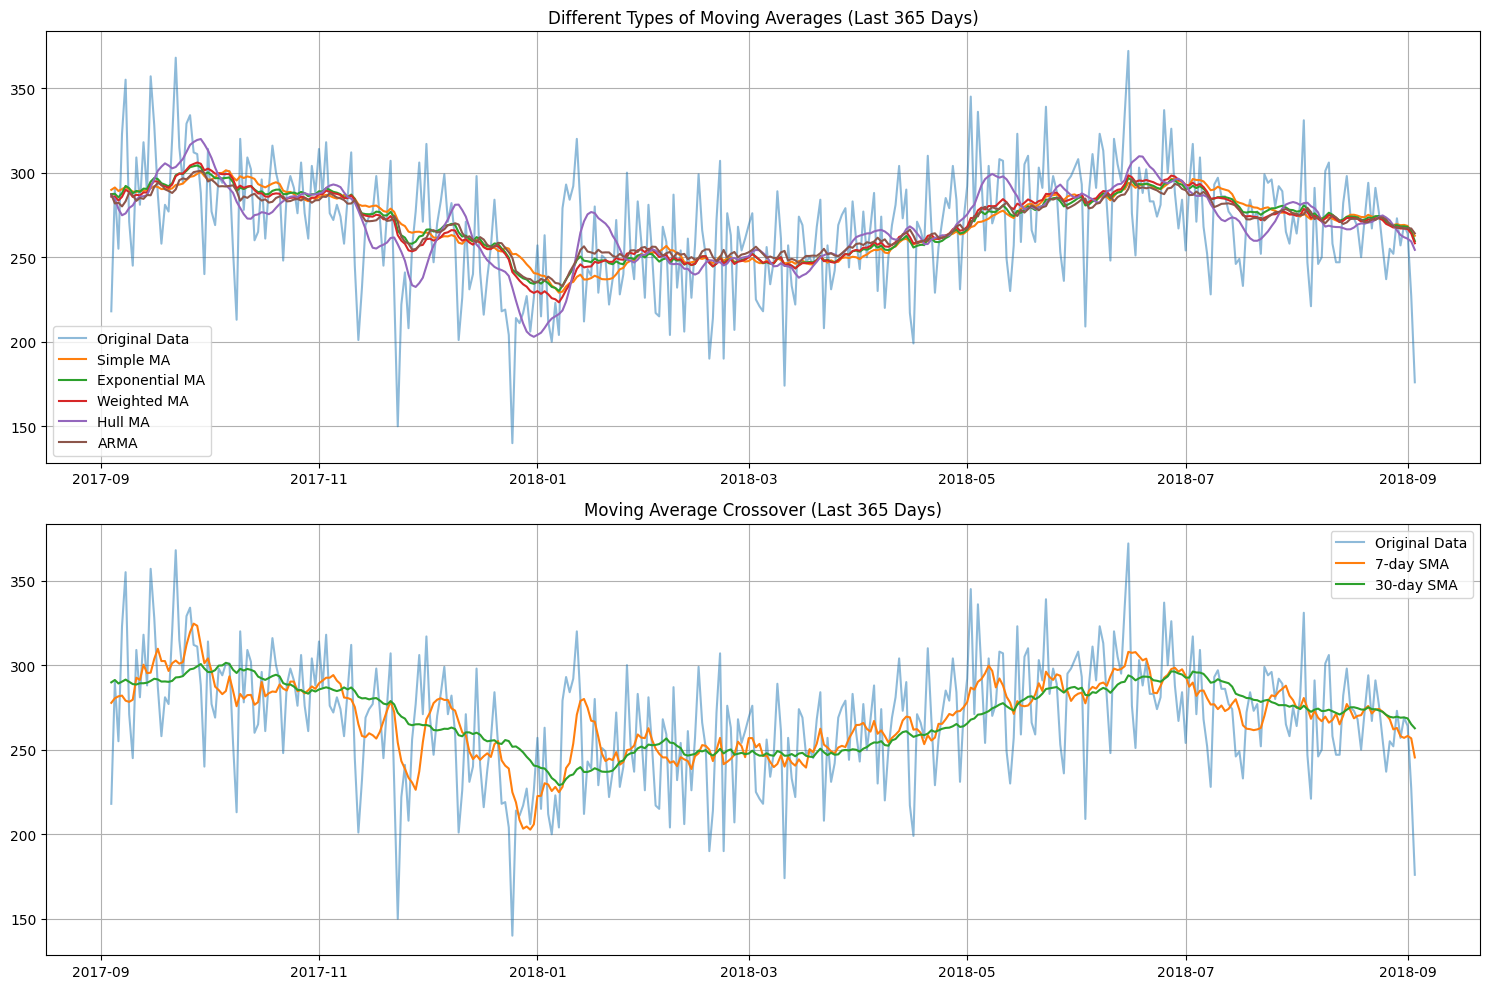


Moving Average Statistics (last 30 days):
Simple MA mean: 271.82
Exponential MA mean: 271.85
Weighted MA mean: 270.72
Hull MA mean: 268.85
ARMA mean: 271.05

Recent Moving Average Crossover Points:
2018-08-16: Bearish crossover
2018-08-20: Bullish crossover
2018-08-22: Bearish crossover
2018-08-24: Bullish crossover
2018-08-25: Bearish crossover


<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

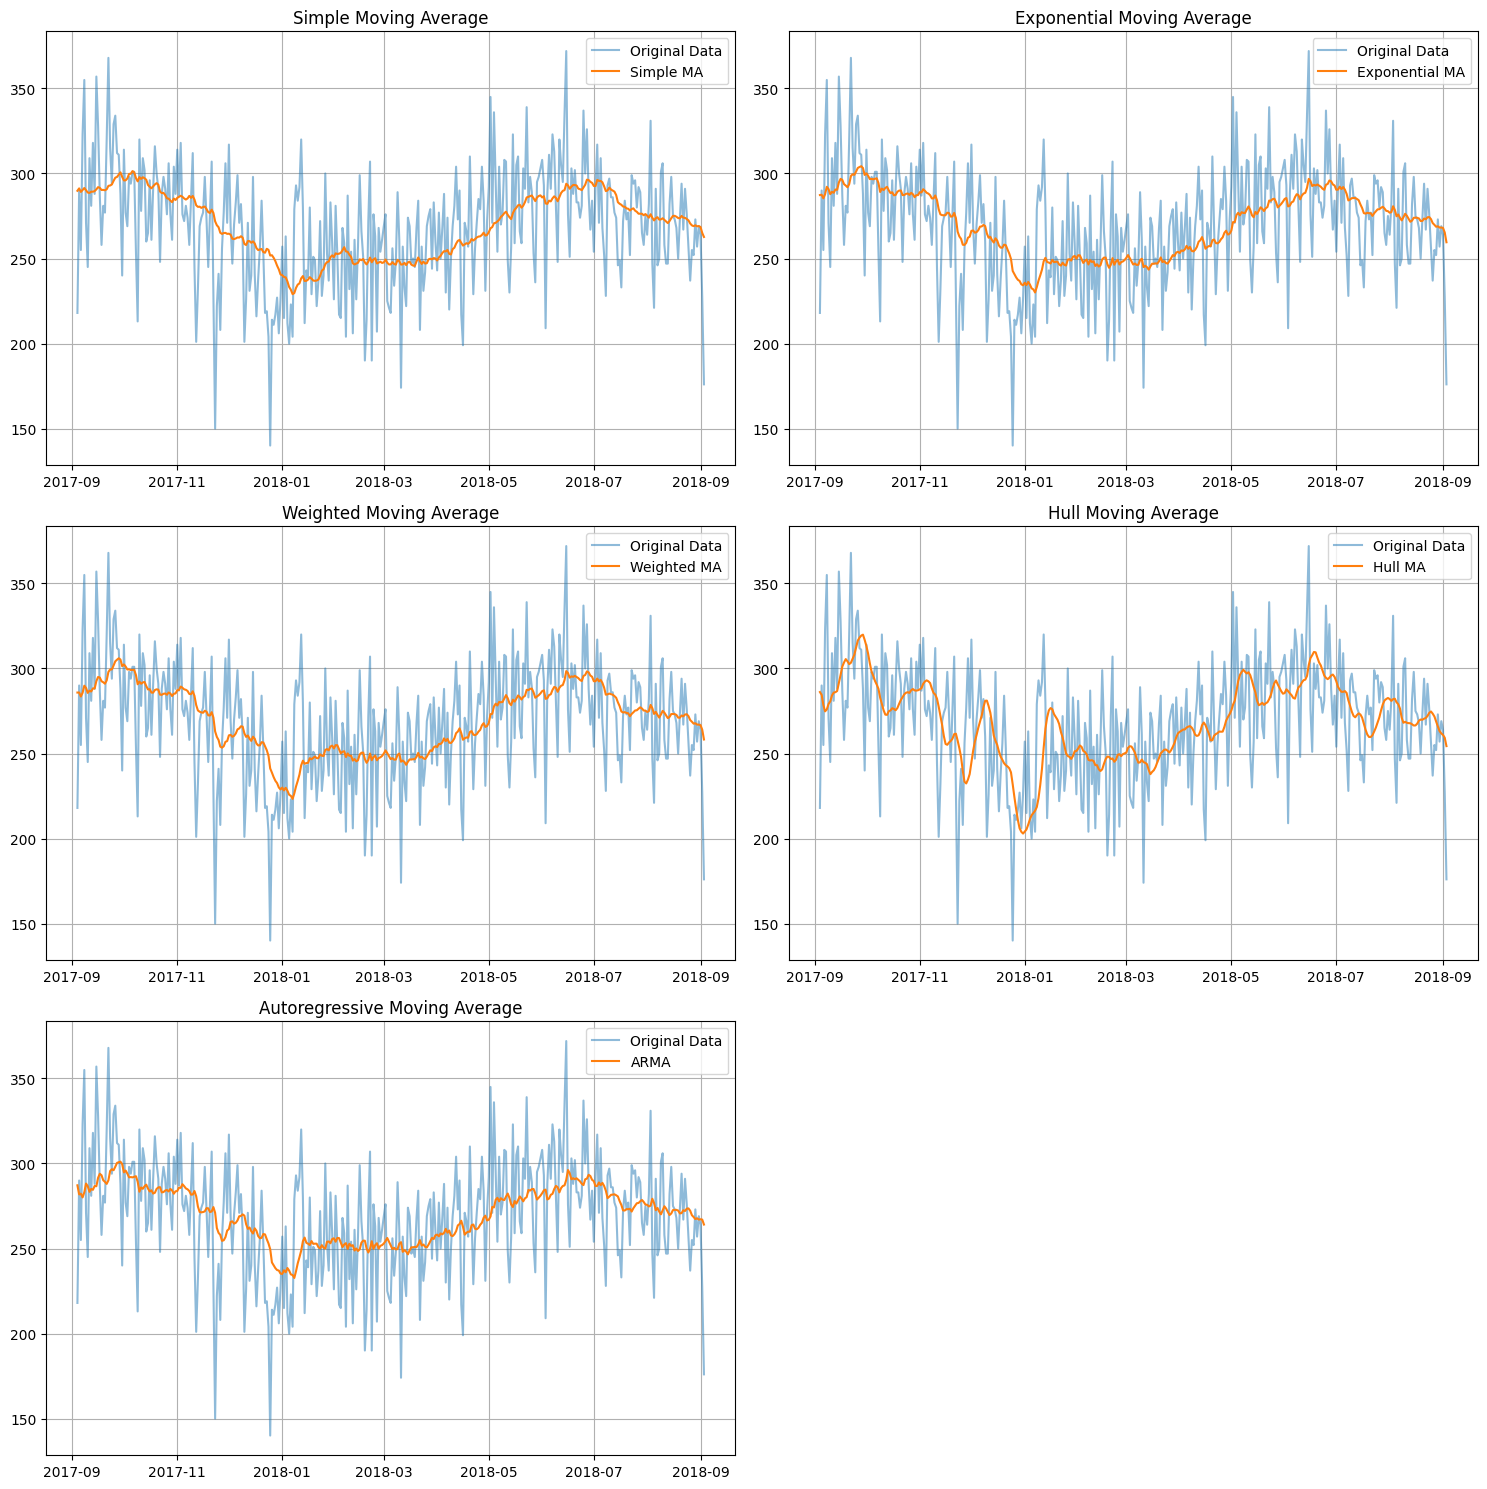

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

# Read the data
crime_df = pd.read_csv('crime.csv', encoding='latin1')
crime_df['OCCURRED_ON_DATE'] = pd.to_datetime(crime_df['OCCURRED_ON_DATE'])
crime_df.set_index('OCCURRED_ON_DATE', inplace=True)

# Create daily crime count
daily_crimes = crime_df.resample('D').size()

# Calculate different types of moving averages
def calculate_moving_averages(data, window=30):
    # Simple Moving Average (SMA)
    sma = data.rolling(window=window).mean()
    
    # Exponential Moving Average (EMA)
    ema = data.ewm(span=window, adjust=False).mean()
    
    # Weighted Moving Average (WMA)
    weights = np.arange(1, window + 1)
    wma = data.rolling(window=window).apply(
        lambda x: np.sum(weights * x) / weights.sum()
    )
    
    # Hull Moving Average (HMA)
    wma1 = data.rolling(window=window//2).apply(
        lambda x: np.sum(np.arange(1, len(x) + 1) * x) / np.sum(np.arange(1, len(x) + 1))
    )
    wma2 = data.rolling(window=window).apply(
        lambda x: np.sum(np.arange(1, len(x) + 1) * x) / np.sum(np.arange(1, len(x) + 1))
    )
    hma = (2 * wma1 - wma2).rolling(window=int(np.sqrt(window))).mean()
    
    return sma, ema, wma, hma

# Calculate moving averages
sma, ema, wma, hma = calculate_moving_averages(daily_crimes)

# Fit ARIMA model for ARMA
model = ARIMA(daily_crimes, order=(1, 0, 1))
arma_fit = model.fit()
arma = pd.Series(arma_fit.fittedvalues, index=daily_crimes.index)

# Plot results
plt.figure(figsize=(15, 10))

# Plot 1: All Moving Averages
plt.subplot(2, 1, 1)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(sma.index[-365:], sma[-365:], label='Simple MA')
plt.plot(ema.index[-365:], ema[-365:], label='Exponential MA')
plt.plot(wma.index[-365:], wma[-365:], label='Weighted MA')
plt.plot(hma.index[-365:], hma[-365:], label='Hull MA')
plt.plot(arma.index[-365:], arma[-365:], label='ARMA')
plt.title('Different Types of Moving Averages (Last 365 Days)')
plt.legend()
plt.grid(True)

# Plot 2: Moving Average Crossover
plt.subplot(2, 1, 2)
short_sma = daily_crimes.rolling(window=7).mean()
long_sma = daily_crimes.rolling(window=30).mean()
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(short_sma.index[-365:], short_sma[-365:], label='7-day SMA')
plt.plot(long_sma.index[-365:], long_sma[-365:], label='30-day SMA')
plt.title('Moving Average Crossover (Last 365 Days)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nMoving Average Statistics (last 30 days):")
print(f"Simple MA mean: {sma[-30:].mean():.2f}")
print(f"Exponential MA mean: {ema[-30:].mean():.2f}")
print(f"Weighted MA mean: {wma[-30:].mean():.2f}")
print(f"Hull MA mean: {hma[-30:].mean():.2f}")
print(f"ARMA mean: {arma[-30:].mean():.2f}")

# Calculate crossover signals
crossover_signals = pd.DataFrame({
    'Short_MA': short_sma,
    'Long_MA': long_sma
})
crossover_signals['Signal'] = np.where(crossover_signals['Short_MA'] > crossover_signals['Long_MA'], 1, -1)
crossover_signals['Signal_Change'] = crossover_signals['Signal'].diff()

# Print crossover points
print("\nRecent Moving Average Crossover Points:")
crossover_points = crossover_signals[crossover_signals['Signal_Change'] != 0].tail(5)
for date, row in crossover_points.iterrows():
    signal = "Bullish" if row['Signal_Change'] > 0 else "Bearish"
    print(f"{date.date()}: {signal} crossover")
    # Plot individual moving averages
    plt.figure(figsize=(15, 15))

# Original Data with Simple Moving Average
plt.subplot(3, 2, 1)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(sma.index[-365:], sma[-365:], label='Simple MA')
plt.title('Simple Moving Average')
plt.legend()
plt.grid(True)

# Original Data with Exponential Moving Average
plt.subplot(3, 2, 2)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(ema.index[-365:], ema[-365:], label='Exponential MA')
plt.title('Exponential Moving Average')
plt.legend()
plt.grid(True)

# Original Data with Weighted Moving Average
plt.subplot(3, 2, 3)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(wma.index[-365:], wma[-365:], label='Weighted MA')
plt.title('Weighted Moving Average')
plt.legend()
plt.grid(True)

# Original Data with Hull Moving Average
plt.subplot(3, 2, 4)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(hma.index[-365:], hma[-365:], label='Hull MA')
plt.title('Hull Moving Average')
plt.legend()
plt.grid(True)

# Original Data with ARMA
plt.subplot(3, 2, 5)
plt.plot(daily_crimes.index[-365:], daily_crimes[-365:], label='Original Data', alpha=0.5)
plt.plot(arma.index[-365:], arma[-365:], label='ARMA')
plt.title('Autoregressive Moving Average')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()